In [101]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/tan_drive')


Drive already mounted at /content/tan_drive; to attempt to forcibly remount, call drive.mount("/content/tan_drive", force_remount=True).


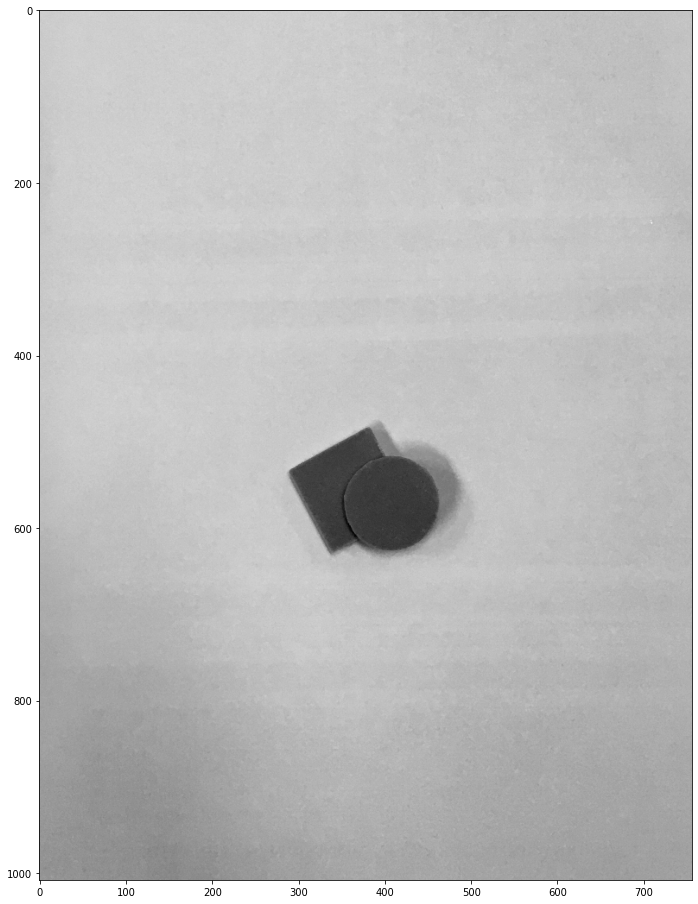

In [102]:
# read image through command line
img = cv2.imread("/content/tan_drive/MyDrive/Transfer file iphone2cpt/IMG_8612.JPG") #15 vuong tren tron, 12 tron tren vuong, 10 vuong tren vuong
h, w = int(img.shape[0]), int(img.shape[1])

ratio = w/h
start_point =(400,900) #x,y
h_cut = 2700

img = img[start_point[1]:start_point[1]+h_cut,start_point[0]:start_point[0]+int(h_cut*ratio)] # cut follow y:y+h,x:x+w
img = cv2.resize(img, (w//4,h//4))
use = cv2.medianBlur(img.copy(),11)
plt.figure(figsize=(12,16))
plt.imshow(img[...,1],cmap='gray')



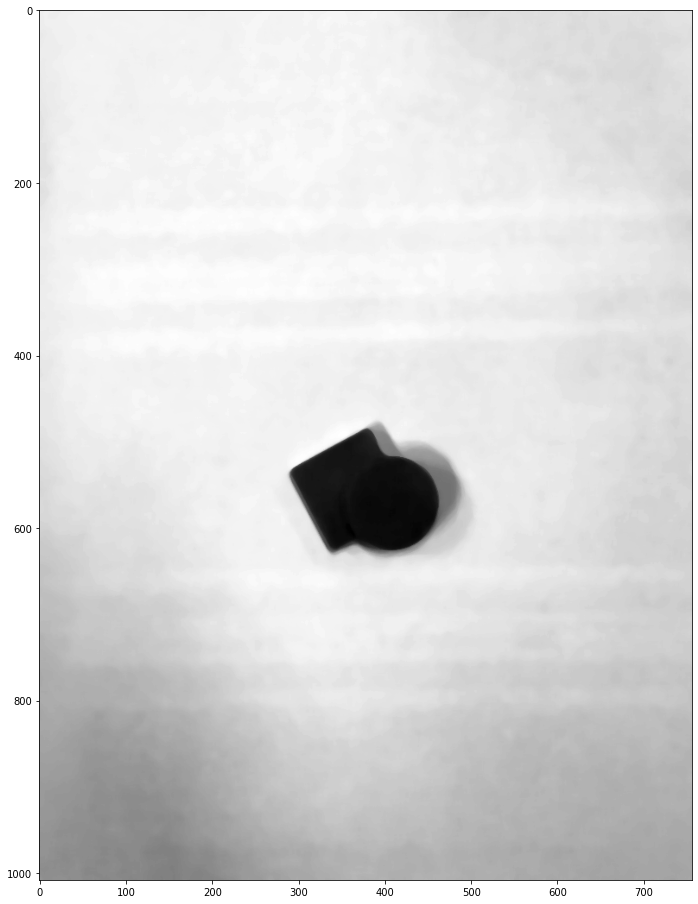

In [103]:
# convert the image to grayscale
gray_image = use[...,0]
plt.figure(figsize=(12,16))
plt.imshow(gray_image,cmap='gray')

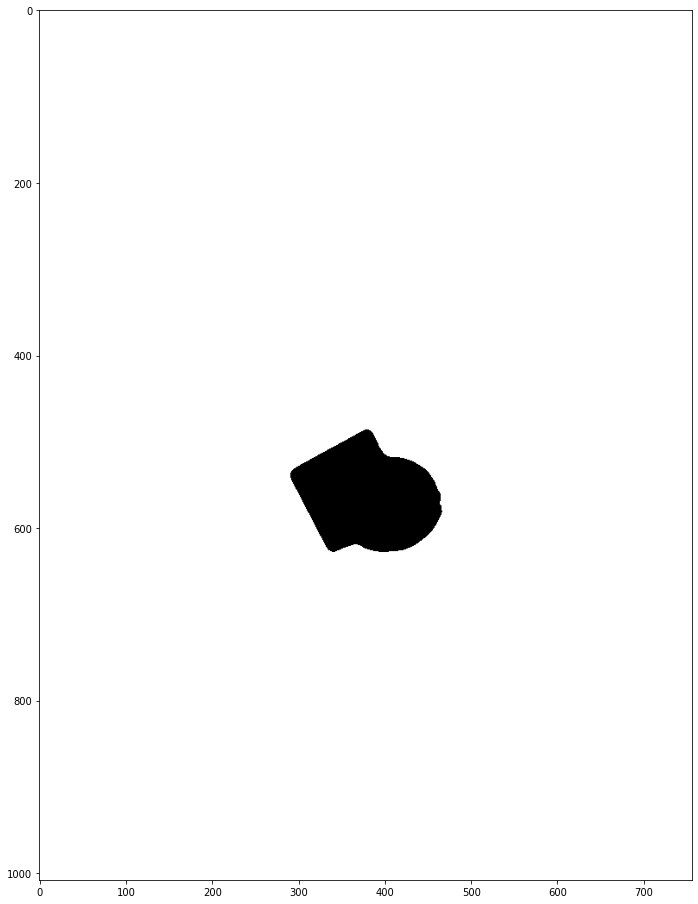

In [104]:
# convert the grayscale image to binary image
ret,thresh = cv2.threshold(gray_image,150,255,0)
thresh = cv2.dilate(thresh, (2,2), iterations=1)
# thresh = cv2.Canny(gray_image, 30, 200)
plt.figure(figsize=(12,16))
plt.imshow(thresh,cmap='gray')

In [105]:
# find contours in the binary image
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [106]:
for cnt in contours:
  print(cv2.contourArea(cnt))

760285.0
17051.5


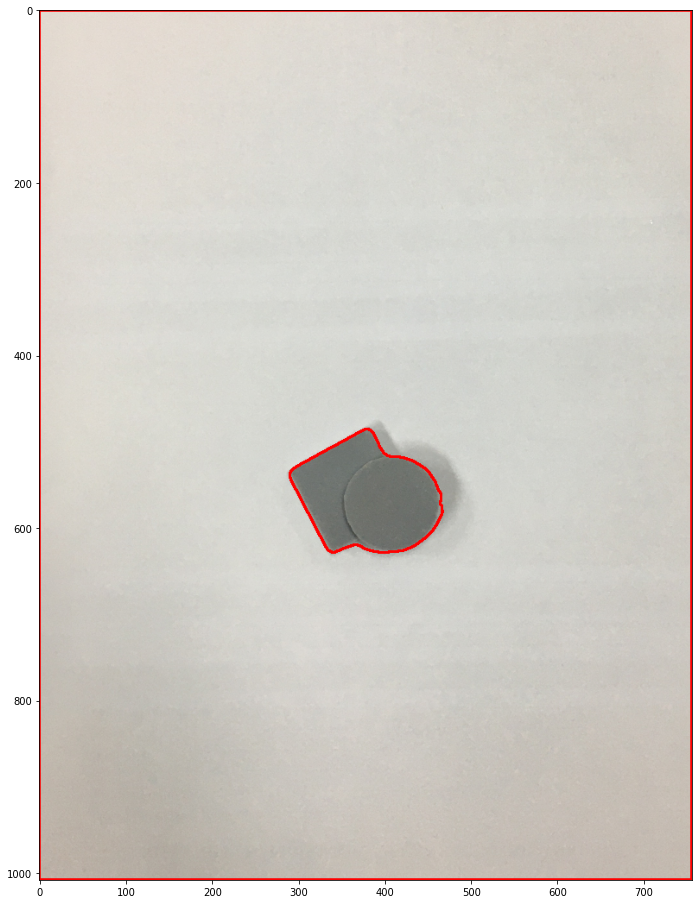

In [107]:
vd = img.copy()
cv2.drawContours(vd,contours,-1,(0,0,255),2)
plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(vd,cv2.COLOR_BGR2RGB))

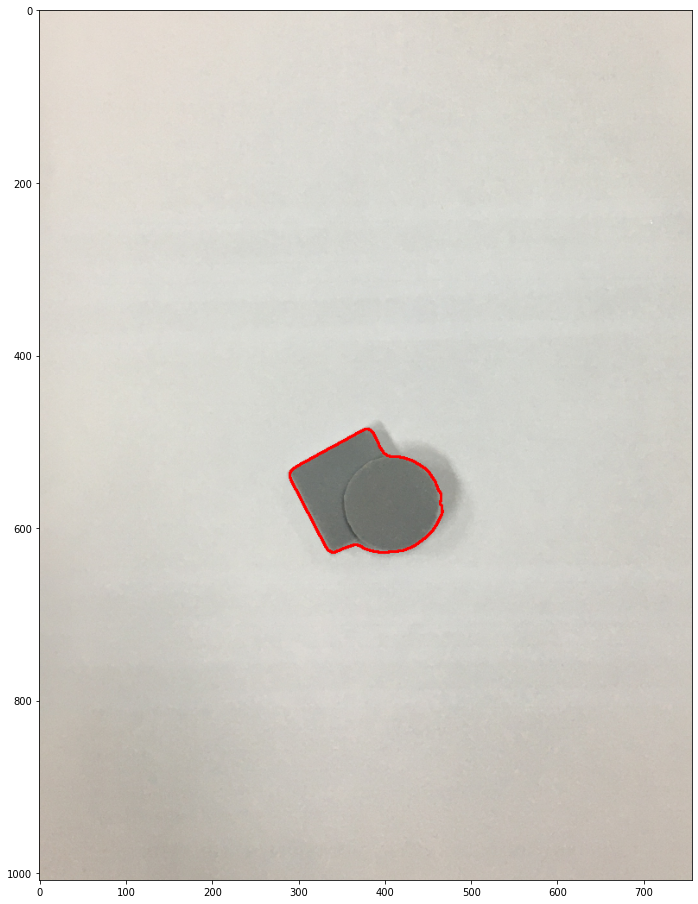

In [108]:
cnts = [cnt for cnt in contours if cv2.contourArea(cnt) >= 7000 and cv2.contourArea(cnt) < 26000 ]
vd = img.copy()
cv2.drawContours(vd,cnts,-1,(0,0,255),2)
plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(vd,cv2.COLOR_BGR2RGB))

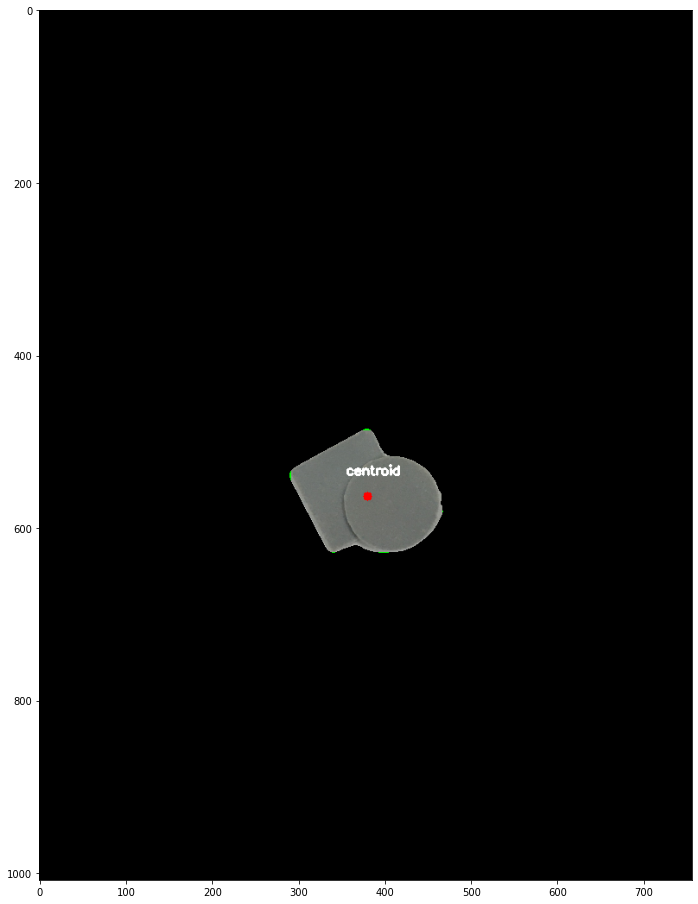

In [116]:
mask = np.zeros_like(img)

cv2.drawContours(mask,cnts,-1,(255,255,255),-1) #draw filled contours in mask
out = np.zeros_like(img)
out[mask ==255] =img[mask==255]
plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB))

In [110]:
for c in cnts:
     # calculate moments for each contour
    (x,y,w,h) = cv2.boundingRect(c)
    # print(x,y,w,h)

    # calculate x,y coordinate of center
    if x > 0 and w > 30:
        try:
            cv2.rectangle(img, (x,y),(x+w, y+h), (0,255,0), 2)
            M = cv2.moments(c)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            cv2.circle(img, (cX, cY), 5, (0, 0, 255), -1)
            cv2.putText(img, "centroid", (cX - 25, cY - 25),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
        except:
            continue

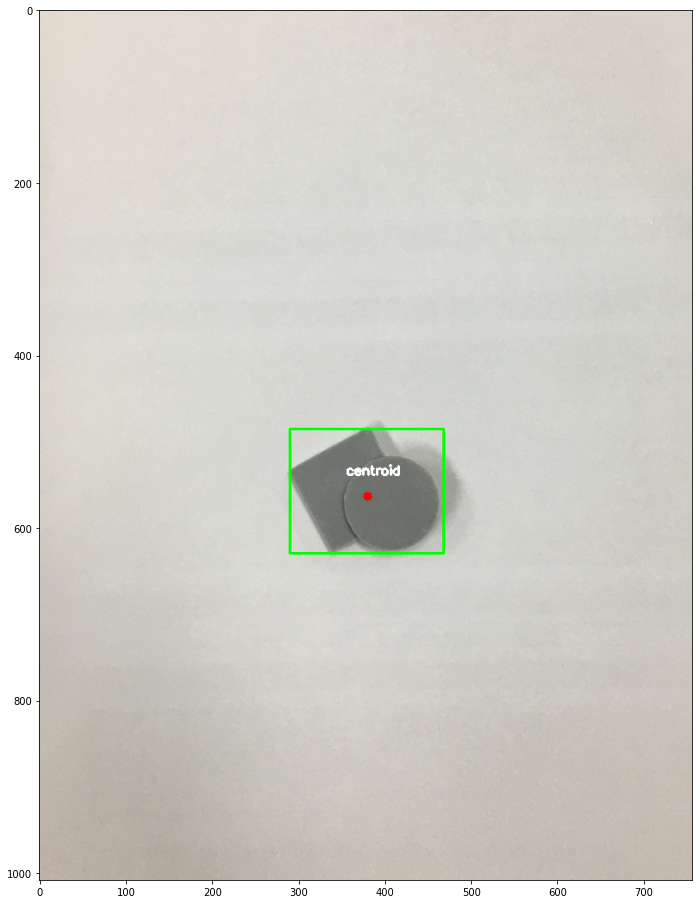

In [111]:
plt.figure(figsize=(12,16))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [112]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# gray = cv2.GaussianBlur(gray, (7,7),0)

# # circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, h/2,
# #                           param1=100, param2=30,
# #                           minRadius=1, maxRadius=30)
# cny = cv2.Canny(gray ,70,120,apertureSize=3,L2gradient=1)
# plt.figure(figsize=(8,12))
# plt.imshow(cny,cmap='gray')

In [113]:
# # convert the grayscale image to binary image
# ret,thresh = cv2.threshold(gray_image,150,255,0)
# thresh = cv2.dilate(thresh, (1,1), iterations=1)
# # thresh = cv2.Canny(gray_image, 30, 200)
# plt.figure(figsize=(8,12))
# plt.imshow(thresh,cmap='gray')
# plt.show()